In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/text-classification-data/training.csv
/kaggle/input/text-classification-data/test.csv


In [2]:
import pandas as pd
import numpy as np
df1 = pd.read_csv('/kaggle/input/text-classification-data/training.csv')
df2 = pd.read_csv('/kaggle/input/text-classification-data/test.csv')
df1.head()

,article_number,article_words,topic
0,1,"open,absent,cent,cent,cent,stock,inflow,rate,k...",FOREX MARKETS
1,2,"morn,stead,end,end,day,day,day,patch,patch,pat...",MONEY MARKETS
2,3,"socc,socc,world,world,recent,law,fifa,fifa,fif...",SPORTS
3,4,"open,forint,forint,forint,forint,cent,cent,ste...",FOREX MARKETS
4,5,"morn,complet,weekend,minut,minut,minut,arrow,d...",IRRELEVANT


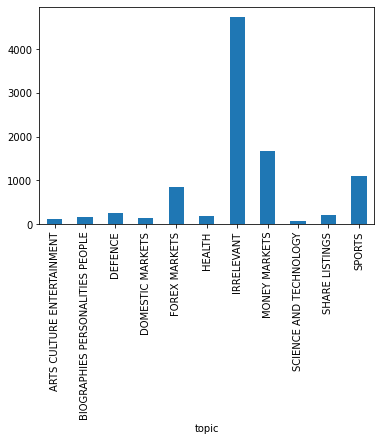

In [3]:
import matplotlib.pyplot as plt
df1.groupby('topic').article_words.count().plot.bar(ylim=0)
plt.show()

In [4]:
category_codes = {
    'ARTS CULTURE ENTERTAINMENT': 0,
    'BIOGRAPHIES PERSONALITIES PEOPLE': 1,
    'DEFENCE': 2,
    'DOMESTIC MARKETS': 3,
    'FOREX MARKETS': 4,
    'HEALTH': 5,
    'MONEY MARKETS': 6,
    'SCIENCE AND TECHNOLOGY': 7,
    'SHARE LISTINGS': 8,
    'SPORTS': 9,
    'IRRELEVANT': 10
}

In [5]:
df1 = df1.replace(category_codes)
df2 = df2.replace(category_codes)

In [6]:
data = pd.concat([df1['article_words'],df2['article_words']])

In [7]:
len(data)

10000

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
# Create bag of words
count = TfidfVectorizer()
bag_of_words = count.fit(data)

In [9]:
x_train = df1['article_words']
y_train = df1['topic'].to_list()
x_test = df2['article_words']
y_test = df2['topic'].to_list()

In [10]:
#Transforming the testing and training
x_train = bag_of_words.transform(x_train)
x_test = bag_of_words.transform(x_test)

In [11]:
#TFID vectoriser
#print(count.get_feature_names())

In [12]:
#X2 = count.fit_transform(x_train) 
#print(X2.toarray())

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit

In [14]:
#Cross-Validation for Hyperparameter tuning
knn =KNeighborsClassifier()
model = knn.fit(x_train,y_train)

In [15]:
y_predict = model.predict(x_test)

In [16]:
train_accuracy_score = accuracy_score(y_train,model.predict(x_train))
test_accuracy_score = accuracy_score(y_test,model.predict(x_test))
print(f'Accuracy Score for training data : {train_accuracy_score}.\n')
print(f'Accuracy Score for testing data : {test_accuracy_score}.\n')

Accuracy Score for training data : 0.8090526315789474.

Accuracy Score for testing data : 0.702.



In [17]:
#Classification Report and Metrics Report
print(precision_score(y_test, y_predict,average = 'micro'))
print(recall_score(y_test, y_predict,average='micro'))
print(f1_score(y_test, y_predict, average='micro'))
print(f1_score(y_test, y_predict, average='macro'))
print(classification_report(y_test, y_predict))

0.702
0.702
0.702
0.5007780538444128
              precision    recall  f1-score   support

           0       0.33      0.33      0.33         3
           1       0.60      0.20      0.30        15
           2       0.58      0.54      0.56        13
           3       0.33      0.50      0.40         2
           4       0.33      0.46      0.38        48
           5       0.62      0.71      0.67        14
           6       0.45      0.61      0.52        69
           7       0.00      0.00      0.00         3
           8       1.00      0.43      0.60         7
           9       0.93      0.92      0.92        60
          10       0.87      0.78      0.82       266

    accuracy                           0.70       500
   macro avg       0.55      0.50      0.50       500
weighted avg       0.74      0.70      0.71       500



In [28]:
#from sklearn import metrics
#calculating auc roc score before cross validation
#fp_rate, tp_rate, thresholds = metrics.roc_curve(y_test, y_predict)

In [20]:
#paramter tuning using grid search
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': [3,5,11,19], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}
grid = GridSearchCV(KNeighborsClassifier(),param_grid,verbose=1, cv=3, n_jobs = -1)
grid.fit(x_train,y_train)
print(grid.best_estimator_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='distance')


[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  3.9min finished


In [21]:
#After corss validation
knn_1 = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='distance')
model_1 = knn_1.fit(x_train,y_train)

In [25]:
y_predict_1 = model_1.predict(x_test)

In [ ]:
#calculating auc roc score after cross validation
#fp_rate1, tp_rate1, thresholds1 = roc_curve(y_test, y_predict_1)

In [27]:
#Classification Report and Metrics Report
print(precision_score(y_test, y_predict_1,average = 'micro'))
print(recall_score(y_test, y_predict_1,average='micro'))
print(f1_score(y_test, y_predict_1, average='micro'))
print(f1_score(y_test, y_predict_1, average='macro'))
print(classification_report(y_test, y_predict_1))

0.708
0.708
0.708
0.4197309732031011
              precision    recall  f1-score   support

           0       0.33      0.33      0.33         3
           1       0.00      0.00      0.00        15
           2       0.80      0.62      0.70        13
           3       0.00      0.00      0.00         2
           4       0.37      0.40      0.38        48
           5       0.60      0.43      0.50        14
           6       0.44      0.68      0.54        69
           7       0.00      0.00      0.00         3
           8       0.67      0.29      0.40         7
           9       0.92      0.97      0.94        60
          10       0.85      0.80      0.82       266

    accuracy                           0.71       500
   macro avg       0.45      0.41      0.42       500
weighted avg       0.71      0.71      0.70       500



In [ ]:
#from sklearn.feature_extraction.text import CountVectorizer
#count_1 = CountVectorizer()
#bag_of_words_1 = count_1.fit(data)